In [13]:
%matplotlib inline

import glob

import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn

In [2]:
files = sorted(glob.glob('./data/input/sber/SBER_200406_200410.csv'))
print(files)


['./data/input/sber/SBER_200406_200410.csv']


In [4]:
df = pd.concat(map(lambda x: pd.read_csv(x, sep=';', header=0, index_col=0,
                                         names=['ticker', 'per','date', 'time', 'price', 'vol'],
                                         parse_dates = {'timestamp': [2, 3]}),
                   files))
# df.rename(lambda x: x.replace('<', '').replace('>','').lower().replace('last','price'), axis=1, inplace=True)
df.head()

ticker  per   price  vol
timestamp                                   
2020-04-06 09:59:57   SBER    0  187.52   10
2020-04-06 09:59:57   SBER    0  187.52  790
2020-04-06 09:59:57   SBER    0  187.52  210
2020-04-06 09:59:57   SBER    0  187.52   50
2020-04-06 09:59:57   SBER    0  187.52  240

In [7]:
df.dtypes
type(df.index)
# # print(df.dtypes)
# df.date = df.date.astype(str)
# print(df.dtypes)
# df['timestamp'] = df.date.str[:4]+'-'+ df.date.str[4:6]+'-'+df.date.str[6:] + 'T' + df.time
# df.head()

pandas.core.indexes.datetimes.DatetimeIndex

In [5]:
# df.timestamp = pd.to_datetime(df.timestamp.str.replace('D', 'T'))
# df.timestamp = pd.to_datetime(df.timestamp)
# df = df.sort_values('timestamp')
# df.set_index('timestamp', inplace=True)

In [8]:
df.head()
print(df.dtypes)
example = df.price.iloc[0] * df.vol.iloc[0]
print(example)

ticker     object
per         int64
price     float64
vol         int64
dtype: object
1875.2


In [9]:
# can be calculated as  [(High + Low + Close)/3)]
df_vwap = df.groupby(pd.Grouper(freq='1Min')).apply(
    # lambda mini_df:  pd.np.sum(mini_df.price * mini_df.vol) / pd.np.sum(mini_df.vol)
    lambda mini_df:  pd.np.sum(mini_df.price * mini_df.vol) / pd.np.sum(mini_df.vol)
)

df_vwap.head()


C:\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
C:\Python\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


timestamp
2020-04-06 09:59:00    187.520000
2020-04-06 10:00:00    188.159885
2020-04-06 10:01:00    188.236866
2020-04-06 10:02:00    187.900291
2020-04-06 10:03:00    187.437616
dtype: float64

In [10]:
print(type(df_vwap))
print(df_vwap.shape)

data_frame  = pd.DataFrame(data=df_vwap)
print(type(data_frame))
data_frame.head()

<class 'pandas.core.series.Series'>
(6291,)
<class 'pandas.core.frame.DataFrame'>


0
timestamp                      
2020-04-06 09:59:00  187.520000
2020-04-06 10:00:00  188.159885
2020-04-06 10:01:00  188.236866
2020-04-06 10:02:00  187.900291
2020-04-06 10:03:00  187.437616

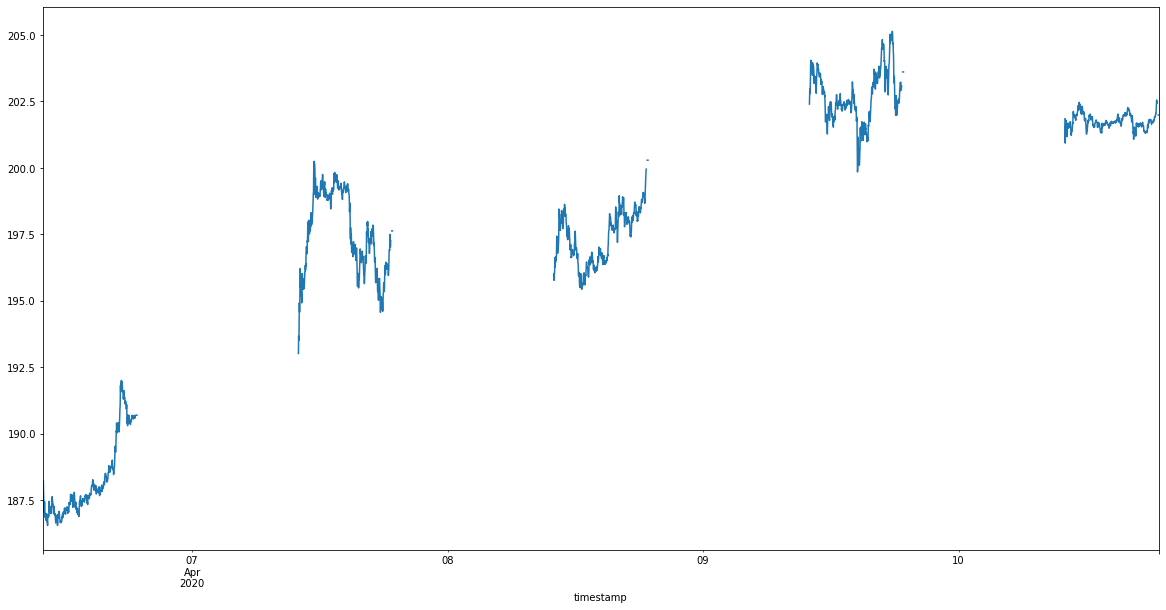

In [12]:
ax = df_vwap.plot(figsize=(20,10))
# plt.axvline("2020-04-01T15:00:00", linewidth=1.0, linestyle="--", c="black")
# plt.axvline("2020-04-01T18:00:00", linewidth=1.0, linestyle="--", c="black")


In [10]:
# df_vwap.head()


In [11]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data = scaler.fit_transform(df_vwap.to_frame())


In [14]:
# Input dimension - represents the size of the input at each time step, e.g.
# input of dimension 5 will look like this [1, 3, 8, 2, 3]
# Hidden dimension - represents the size of the hidden state and cell state at each time step,
# e.g. the hidden state and cell state will both have the shape of [3, 5, 4] if the hidden dimension is 3
# Number of layers - the number of LSTM layers stacked on top of each other

input_dim = 5
hidden_dim = 10
n_layers = 1

lstm_layer = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True)

In [16]:
batch_size = 1
seq_len = 1

inp = torch.randn(batch_size, seq_len, input_dim)
hidden_state = torch.randn(n_layers, batch_size, hidden_dim)
cell_state = torch.randn(n_layers, batch_size, hidden_dim)
hidden = (hidden_state, cell_state)

print(inp.shape)


torch.Size([1, 1, 5])


In [17]:
# Next, we’ll feed the input and hidden states and see what we’ll get back from it.

out, hidden = lstm_layer(inp, hidden)
print("Output shape: ", out.shape)
print("Hidden: ", hidden)


Output shape:  torch.Size([1, 1, 10])
Hidden:  (tensor([[[ 0.1346,  0.5483, -0.1121,  0.3981, -0.0129, -0.0221, -0.0341,
           0.0026,  0.1872, -0.1708]]], grad_fn=<StackBackward>), tensor([[[ 0.2971,  1.0825, -0.2035,  0.7542, -0.0191, -0.1214, -0.0569,
           0.0084,  0.5142, -0.6172]]], grad_fn=<StackBackward>))


In [18]:
# The LSTM can also take in sequences of variable length and produce an output at each time step. Let's try changing the sequence length this time.

seq_len = 3
inp = torch.randn(batch_size, seq_len, input_dim)
out, hidden = lstm_layer(inp, hidden)
print(out.shape)

torch.Size([1, 3, 10])


In [19]:
# Obtaining the last output
out = out.squeeze()[-1, :]
print(out.shape)



torch.Size([10])
